# Supervised Learning Part 1 -- Classification

- toc: true
- badges: true
- author: Berdakh Abibullaev
- categories: [EEG, MNE, jupyter]
- description: Introduction to a machine learning using sklearn - part #3

To visualize the workings of machine learning algorithms, it is often helpful to study two-dimensional or one-dimensional data, that is data with only one or two features. While in practice, datasets usually have many more features, it is hard to plot high-dimensional data in on two-dimensional screens.

We will illustrate some very simple examples before we move on to more "real world" data sets.

First, we will look at a two class classification problem in two dimensions. We use the synthetic data generated by the ``make_blobs`` function.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=2, random_state=0)

print('X ~ n_samples x n_features:', X.shape)
print('y ~ n_samples:', y.shape)

print('\nFirst 5 samples:\n', X[:5, :])
print('\nFirst 5 labels:', y[:5])

X ~ n_samples x n_features: (100, 2)
y ~ n_samples: (100,)

First 5 samples:
 [[ 4.21850347  2.23419161]
 [ 0.90779887  0.45984362]
 [-0.27652528  5.08127768]
 [ 0.08848433  2.32299086]
 [ 3.24329731  1.21460627]]

First 5 labels: [1 1 0 0 1]


As the data is two-dimensional, we can plot each sample as a point in a two-dimensional coordinate system, with the first feature being the x-axis and the second feature being the y-axis.

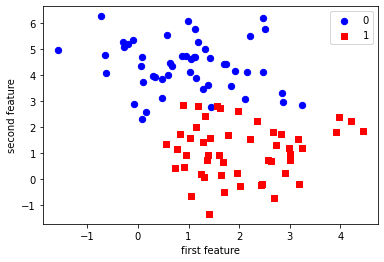

In [3]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', s=40, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', s=40, label='1', marker='s')

plt.xlabel('first feature')
plt.ylabel('second feature')
plt.legend(loc='upper right');

Classification is a supervised task, and since we are interested in its performance on unseen data, we split our data into two parts:

1. a training set that the learning algorithm uses to fit the model
2. a test set to evaluate the generalization performance of the model

The ``train_test_split`` function from the ``model_selection`` module does that for us -- we will use it to split a dataset into 75% training data and 25% test data.

<img src="figures/train_test_split_matrix.svg" width="40%">

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=1234,
                                                    stratify=y)

### The scikit-learn estimator API
<img src="figures/supervised_workflow.svg" width="50%">


Every algorithm is exposed in scikit-learn via an ''Estimator'' object. (All models in scikit-learn have a very consistent interface). For instance, we first import the logistic regression class.

In [5]:
from sklearn.linear_model import LogisticRegression

Next, we instantiate the estimator object.

In [8]:
classifier = LogisticRegression()

In [9]:
X_train.shape

(75, 2)

In [10]:
y_train.shape

(75,)

To built the model from our data, that is to learn how to classify new points, we call the ``fit`` function with the training data, and the corresponding training labels (the desired output for the training data point):

In [11]:
classifier.fit?

Signature: classifier.fit(X, y, sample_weight=None)
Docstring:
Fit the model according to the given training data.

Parameters
----------
X : {array-like, sparse matrix} of shape (n_samples, n_features)
    Training vector, where n_samples is the number of samples and
    n_features is the number of features.

y : array-like of shape (n_samples,)
    Target vector relative to X.

sample_weight : array-like of shape (n_samples,) default=None
    Array of weights that are assigned to individual samples.
    If not provided, then each sample is given unit weight.

    .. versionadded:: 0.17
       *sample_weight* support to LogisticRegression.

Returns
-------
self
    Fitted estimator.

Notes
-----
The SAGA solver supports both float64 and float32 bit arrays.
File:      c:\users\babib\anaconda3\envs\mne\lib\site-packages\sklearn\linear_model\_logistic.py
Type:      method


In [12]:
classifier.fit(X_train, y_train)

LogisticRegression()

(Some estimator methods such as `fit` return `self` by default. Thus, after executing the code snippet above, you will see the default parameters of this particular instance of `LogisticRegression`. Another way of retrieving the estimator's ininitialization parameters is to execute `classifier.get_params()`, which returns a parameter dictionary.)

In [15]:
classifier.coef_

array([[ 0.87015709, -2.23877721]])

In [16]:
classifier.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

We can then apply the model to unseen data and use the model to predict the estimated outcome using the ``predict`` method:

In [17]:
prediction = classifier.predict(X_test)

We can compare these against the true labels:

In [18]:
print(prediction)
print(y_test)

[1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0]
[1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0]


We can evaluate our classifier quantitatively by measuring what fraction of predictions is correct. This is called **accuracy**:

In [20]:
prediction == y_test

array([ True, False,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True])

In [21]:
np.mean(prediction == y_test)

0.84

There is also a convenience function , ``score``, that all scikit-learn classifiers have to compute this directly from the test data:
    

In [22]:
classifier.score(X_test, y_test)

0.84

It is often helpful to compare the generalization performance (on the test set) to the performance on the training set:

In [24]:
classifier.score(X_train, y_train)

0.9733333333333334

LogisticRegression is a so-called linear model,
that means it will create a decision that is linear in the input space. In 2d, this simply means it finds a line to separate the blue from the red:

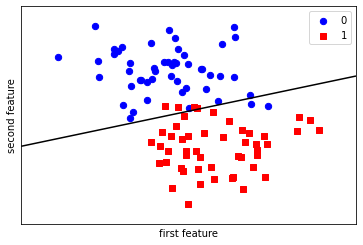

In [26]:
from figures import plot_2d_separator

plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue',s=40, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', s=40, label='1', marker='s')

plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(classifier, X)
plt.legend(loc='upper right');

**Estimated parameters**: All the estimated model parameters are attributes of the estimator object ending by an underscore. Here, these are the coefficients and the offset of the line:

In [27]:
print(classifier.coef_)
print(classifier.intercept_)

[[ 0.87015709 -2.23877721]]
[4.64737766]


K Nearest Neighbors (KNN)
------------------------------------------------

Another popular and easy to understand classifier is K nearest neighbors (kNN).  It has one of the simplest learning strategies: given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class.

The KNN classifier is a non-parametric classifier that simply stores the training data $\mathcal{D}$
and classifies each new instance $x$ using a majority vote over its' set of $K$ nearest neighbors $\mathcal{N}_K(x)$ computed using any distance function $d: R^D \times\mathbb{R}^D \rightarrow \mathbb{R} $.

KNN Classification Function:

$$g_{KNN}(x) = argmax_{y\in\mathcal{Y}} \sum_{i\in \mathcal{N}_K(x)} \mathbb{I}[y_i=y]$$


Use of KNN requires choosing the distance function $d$ and the number of neighbors $K$.

![](https://cdn-images-1.medium.com/max/900/1*k8WEP2Kn3YDOopnLzljAJA.png)
![](https://cdn-images-1.medium.com/max/900/1*CZwsWrWNj2KqF1jJ-Z3SPA.png)

![](https://cdn-images-1.medium.com/max/1200/1*4vdvnkZoWgOp0vcLF4wFcA.png)

- In general, KNN can work with any distance function $d$ satisfying non-negativity $d(\bf{x},\bf{x}')\geq 0$ and identity of indiscernibles $d(\bf{x},\bf{x})=0$.

- Alternatively, KNN can work with any similarity function $s$ satisfying non-negativity $s(\bf{x},\bf{y})\geq 0$ that attains it's maximum on indiscernibles $s(\bf{x},\bf{x})=\max_{\bf{x}'} s(\bf{x},\bf{x}')$.

- However, the more structure the distance or similarity function has  (symmetry, triangle inequality), 
the more structure you can exploit when designing algorithms.

## Minkowski Distance ($\ell_p$ norms)}

Given two data vectors $\bf{x},\bf{x}' \in \mathbb{R}^D$, the Minkowski Distance with parameter $p$ (the $\ell_p$ norm) is a proper metric defined as follows:

\begin{align*}
    d_p(\bf{x},\bf{x}') &=  ||\bf{x}-\bf{x}'||_p \\
    &=\left(\sum_{i=1}^D |x_d-x'_d|^p\right)^{1/p}
\end{align*}


Special cases include Euclidean distance ($p=2$), Manhattan distance ($p=1$) and Chebyshev distance ($p=\infty$).

## Brute Force KNN

- Given any distance function $d$, brute force KNN works by computing the distance $d_i = d(\bf{x}_i,\bf{x}_*)$ from a target point $\bf{x}_*$ to all of the training points $\bf{x}_i$.

- You then simply sort the distances $\{d_i,i=1:N\}$ and choose the data cases with the $K$ smallest distances to form the neighbor set $\mathcal{N}_K(\bf{x}_*)$. Using a similarity function is identical, but you select the $K$ most similar data cases. 

- Once the $K$ neighbors are selected, applying the classification rule is easy.


In Sklearn the KNN interface is exactly the same as for ``LogisticRegression above``.

In [22]:
from sklearn.neighbors import KNeighborsClassifier

This time we set a parameter of the KNeighborsClassifier to tell it we only want to look at one nearest neighbor:

In [23]:
knn = KNeighborsClassifier(n_neighbors=1)

We fit the model with out training data

In [24]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

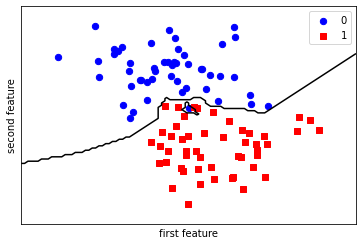

In [25]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', s=40, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', s=40, label='1', marker='s')

plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X)
plt.legend(loc='upper right');

In [26]:
knn.score(X_test, y_test)

1.0

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>
      Apply the KNeighborsClassifier to the ``iris`` dataset. Play with different values of the ``n_neighbors`` and observe how training and test score change.
      </li>
    </ul>
</div>

In [27]:
# %load solutions/05A_knn_with_diff_k.py
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=1234,
                                                    stratify=y)

X_trainsub, X_valid, y_trainsub, y_valid = train_test_split(X_train, y_train,
                                                            test_size=0.5,
                                                            random_state=1234,
                                                            stratify=y_train)

for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k)
    train_score = knn.fit(X_trainsub, y_trainsub).\
        score(X_trainsub, y_trainsub)
    valid_score = knn.score(X_valid, y_valid)
    print('k: %d, Train/Valid Acc: %.3f/%.3f' %
          (k, train_score, valid_score))

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test, y_test))


k: 1, Train/Valid Acc: 1.000/0.946
k: 2, Train/Valid Acc: 1.000/0.964
k: 3, Train/Valid Acc: 1.000/0.946
k: 4, Train/Valid Acc: 1.000/0.964
k: 5, Train/Valid Acc: 1.000/0.929
k: 6, Train/Valid Acc: 1.000/0.929
k: 7, Train/Valid Acc: 1.000/0.929
k: 8, Train/Valid Acc: 1.000/0.929
k: 9, Train/Valid Acc: 1.000/0.929
k: 10, Train/Valid Acc: 1.000/0.946
k: 11, Train/Valid Acc: 1.000/0.946
k: 12, Train/Valid Acc: 1.000/0.964
k: 13, Train/Valid Acc: 1.000/0.929
k: 14, Train/Valid Acc: 1.000/0.946
k: 15, Train/Valid Acc: 1.000/0.929
k: 16, Train/Valid Acc: 1.000/0.929
k: 17, Train/Valid Acc: 1.000/0.929
k: 18, Train/Valid Acc: 0.964/0.946
k: 19, Train/Valid Acc: 0.964/0.929
k=9 Test Acc: 0.974


In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Supervised Learning Part 2 -- Regression Analysis

In regression we are trying to predict a continuous output variable -- in contrast to the nominal variables we were predicting in the previous classification examples. 

Let's start with a simple toy example with one feature dimension (explanatory variable) and one target variable. We will create a dataset out of a sine curve with some noise:

In [29]:
x = np.linspace(-3, 3, 100)
print(x)

[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78787879  1.84848485  1.90909091  1.9

In [30]:
rng = np.random.RandomState(42)
y = np.sin(4 * x) + x + rng.uniform(size=len(x))

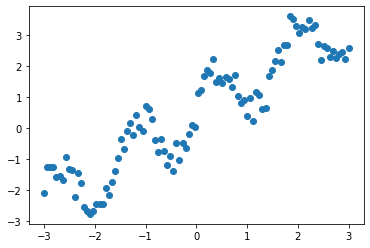

In [31]:
plt.plot(x, y, 'o');

Linear Regression
=================

The first model that we will introduce is the so-called simple linear regression. Here, we want to fit a line to the data, which 

One of the simplest models again is a linear one, that simply tries to predict the data as lying on a line. One way to find such a line is `LinearRegression` (also known as [*Ordinary Least Squares (OLS)*](https://en.wikipedia.org/wiki/Ordinary_least_squares) regression).
The interface for LinearRegression is exactly the same as for the classifiers before, only that ``y`` now contains float values, instead of classes.

As we remember, the scikit-learn API requires us to provide the target variable (`y`) as a 1-dimensional array; scikit-learn's API expects the samples (`X`) in form a 2-dimensional array -- even though it may only consist of 1 feature. Thus, let us convert the 1-dimensional `x` NumPy array into an `X` array with 2 axes:


In [32]:
print('Before: ', x.shape)
X = x[:, np.newaxis]
print('After: ', X.shape)

Before:  (100,)
After:  (100, 1)


Again, we start by splitting our dataset into a training (75%) and a test set (25%):

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Next, we use the learning algorithm implemented in `LinearRegression` to **fit a regression model to the training data**:

In [34]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

After fitting to the training data, we paramerterized a linear regression model with the following values.

In [35]:
print('Weight coefficients: ', regressor.coef_)
print('y-axis intercept: ', regressor.intercept_)

Weight coefficients:  [0.90211711]
y-axis intercept:  0.44840974988268


Since our regression model is a linear one, the relationship between the target variable (y) and the feature variable (x) is defined as 

$$y = weight \times x + \text{intercept}$$.

Plugging in the min and max values into thos equation, we can plot the regression fit to our training data:

In [36]:
min_pt = X.min() * regressor.coef_[0] + regressor.intercept_
max_pt = X.max() * regressor.coef_[0] + regressor.intercept_

print(min_pt, max_pt, X.min(), X.max())

-2.2579415855468374 3.154761085312198 -3.0 3.0


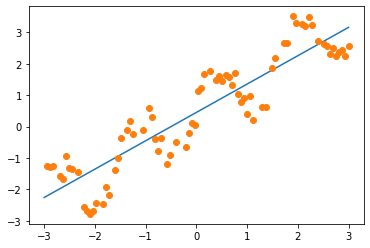

In [37]:
plt.plot([X.min(), X.max()], [min_pt, max_pt])
plt.plot(X_train, y_train, 'o');

Similar to the estimators for classification in the previous notebook, we use the `predict` method to predict the target variable. And we expect these predicted values to fall onto the line that we plotted previously:

In [38]:
y_pred_train = regressor.predict(X_train)

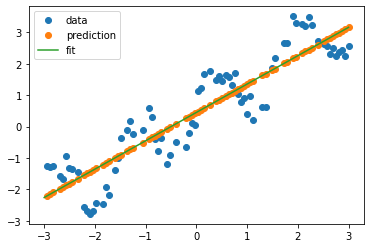

In [39]:
plt.plot(X_train, y_train, 'o', label="data")
plt.plot(X_train, y_pred_train, 'o', label="prediction")
plt.plot([X.min(), X.max()], [min_pt, max_pt], label='fit')
plt.legend(loc='best')

As we can see in the plot above, the line is able to capture the general slope of the data, but not many details.

Next, let's try the test set:

In [55]:
y_pred_test = regressor.predict(X_test)

In [56]:
print(X_test.shape)
print(y_pred_test.shape)

(25, 1)
(25,)


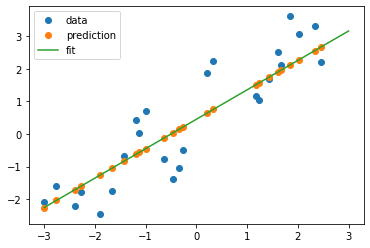

In [42]:
plt.plot(X_test, y_test, 'o', label="data")
plt.plot(X_test, y_pred_test, 'o', label="prediction")
plt.plot([X.min(), X.max()], [min_pt, max_pt], label='fit')
plt.legend(loc='best');

Again, scikit-learn provides an easy way to evaluate the prediction quantitatively using the ``score`` method. For regression tasks, this is the R<sup>2</sup> score. Another popular way would be the Mean Squared Error (MSE). As its name implies, the MSE is simply the average squared difference over the predicted and actual target values

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (\text{predicted}_i - \text{true}_i)^2$$

In [43]:
regressor.score(X_test, y_test)

0.7994321405079685

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>
      Add a feature containing  `sin(4x)` to `X` and redo the fit. Visualize the predictions with this new richer, yet linear, model.
      </li>
    </ul>
</div>

In [ ]:
# %load solutions/06B_lin_with_sine.py

KNeighborsRegression
=======================
As for classification, we can also use a neighbor based method for regression. We can simply take the output of the nearest point, or we could average several nearest points. This method is less popular for regression than for classification, but still a good baseline.

In [44]:
from sklearn.neighbors import KNeighborsRegressor

kneighbor_regression = KNeighborsRegressor(n_neighbors=1)

kneighbor_regression.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

Again, let us look at the behavior on training and test set:

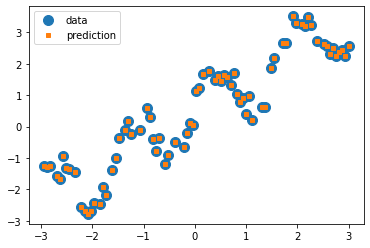

In [45]:
y_pred_train = kneighbor_regression.predict(X_train)

plt.plot(X_train, y_train, 'o', label="data", markersize=10)
plt.plot(X_train, y_pred_train, 's', label="prediction", markersize=4)
plt.legend(loc='best');

On the training set, we do a perfect job: each point is its own nearest neighbor!

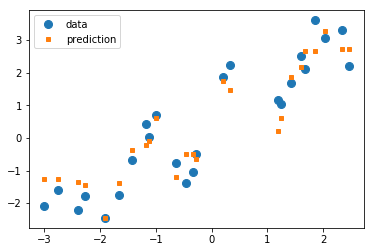

In [84]:
y_pred_test = kneighbor_regression.predict(X_test)

plt.plot(X_test, y_test, 'o', label="data", markersize=8)
plt.plot(X_test, y_pred_test, 's', label="prediction", markersize=4)
plt.legend(loc='best');

On the test set, we also do a better job of capturing the variation, but our estimates look much messier than before.
Let us look at the R<sup>2</sup> score:

In [85]:
kneighbor_regression.score(X_test, y_test)

0.9166293022467948

Much better than before! Here, the linear model was not a good fit for our problem; it was lacking in complexity and thus under-fit our data.

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>
      Compare the KNeighborsRegressor and LinearRegression on the boston housing dataset. You can load the dataset using ``sklearn.datasets.load_boston``. You can learn about the dataset by reading the ``DESCR`` attribute.
      </li>
    </ul>
</div>

In [ ]:
# %load solutions/06A_knn_vs_linreg.py

# Cross-Validation and scoring methods

In the previous sections and notebooks, we split our dataset into two parts, a training set and a test set. We used the training set to fit our model, and we used the test set to evaluate its generalization performance -- how well it performs on new, unseen data.

<img src="figures/train_test_split.svg" width="80%">

However, often (labeled) data is precious, and this approach lets us only use ~ 3/4 of our data for training. On the other hand, we will only ever try to apply our model 1/4 of our data for testing.
A common way to use more of the data to build a model, but also get a more robust estimate of the generalization performance, is cross-validation.
In cross-validation, the data is split repeatedly into a training and non-overlapping test-sets, with a separate model built for every pair. The test-set scores are then aggregated for a more robust estimate.

The most common way to do cross-validation is k-fold cross-validation, in which the data is first split into k (often 5 or 10) equal-sized folds, and then for each iteration, one of the k folds is used as test data, and the rest as training data:

<img src="figures/cross_validation.svg" width="80%">


This way, each data point will be in the test-set exactly once, and we can use all but a k'th of the data for training.
Let us apply this technique to evaluate the KNeighborsClassifier algorithm on the Iris dataset:

In [1]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X, y = iris.data, iris.target

classifier = KNeighborsClassifier()

The labels in iris are sorted, which means that if we split the data as illustrated above, the first fold will only have the label 0 in it, while the last one will only have the label 2:

In [2]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

To avoid this problem in evaluation, we first shuffle our data:

In [3]:
import numpy as np
rng = np.random.RandomState(0)

permutation = rng.permutation(len(X))
X, y = X[permutation], y[permutation]
print(y)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0
 1 0 2 1 0 1 2 1 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2 2 0 0 0 1 1 0
 0 1 0 2 1 2 1 0 2 0 2 0 0 2 0 2 1 1 1 2 2 1 1 0 1 2 2 0 1 1 1 1 0 0 0 2 1
 2 0]


Now implementing cross-validation is easy:

In [4]:
k = 5
n_samples = len(X)
fold_size = n_samples // k
scores = []
masks = []

for fold in range(k):
    # generate a boolean mask for the test set in this fold
    test_mask = np.zeros(n_samples, dtype=bool)
    test_mask[fold * fold_size : (fold + 1) * fold_size] = True
    
    # store the mask for visualization
    masks.append(test_mask)
    
    # create training and test sets using this mask
    X_test, y_test = X[test_mask], y[test_mask]
    X_train, y_train = X[~test_mask], y[~test_mask]
    
    # fit the classifier
    classifier.fit(X_train, y_train)
    # compute the score and record it
    
    scores.append(classifier.score(X_test, y_test))

Let's check that our test mask does the right thing:

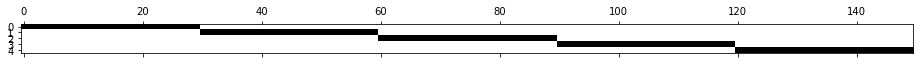

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.matshow(masks, cmap='gray_r')

And now let's look a the scores we computed:

In [6]:
print(scores)

[0.9666666666666667, 0.9, 1.0, 1.0, 0.9333333333333333]


In [7]:
print(np.mean(scores))

0.96


As you can see, there is a rather wide spectrum of scores from 90% correct to 100% correct. If we only did a single split, we might have gotten either answer.

As cross-validation is such a common pattern in machine learning, there are functions to do the above for you with much more flexibility and less code.
The ``sklearn.model_selection`` module has all functions related to cross validation. There easiest function is ``cross_val_score`` which takes an estimator and a dataset, and will do all of the splitting for you:

In [8]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X, y)
print(scores)
print(np.mean(scores))

[1.         0.93333333 1.         1.         0.93333333]
0.9733333333333334


As you can see, the function uses three folds by default. You can change the number of folds using the cv argument:

In [10]:
cross_val_score(classifier, X, y, cv=5)

array([1.        , 0.93333333, 1.        , 1.        , 0.93333333])

There are also helper objects in the cross-validation module that will generate indices for you for all kinds of different cross-validation methods, including k-fold:

In [11]:
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit

By default, cross_val_score will use ``StratifiedKFold`` for classification, which ensures that the class proportions in the dataset are reflected in each fold. If you have a binary classification dataset with 90% of data point belonging to class 0, that would mean that in each fold, 90% of datapoints would belong to class 0.
If you would just use KFold cross-validation, it is likely that you would generate a split that only contains class 0.
It is generally a good idea to use ``StratifiedKFold`` whenever you do classification.

``StratifiedKFold`` would also remove our need to shuffle ``iris``.
Let's see what kinds of folds it generates on the unshuffled iris dataset.
Each cross-validation class is a generator of sets of training and test indices:

In [16]:
cv = StratifiedKFold(n_splits=5)
for train, test in cv.split(iris.data, iris.target):
    print(test)

[  0   1   2   3   4   5   6   7   8   9  50  51  52  53  54  55  56  57
  58  59 100 101 102 103 104 105 106 107 108 109]
[ 10  11  12  13  14  15  16  17  18  19  60  61  62  63  64  65  66  67
  68  69 110 111 112 113 114 115 116 117 118 119]
[ 20  21  22  23  24  25  26  27  28  29  70  71  72  73  74  75  76  77
  78  79 120 121 122 123 124 125 126 127 128 129]
[ 30  31  32  33  34  35  36  37  38  39  80  81  82  83  84  85  86  87
  88  89 130 131 132 133 134 135 136 137 138 139]
[ 40  41  42  43  44  45  46  47  48  49  90  91  92  93  94  95  96  97
  98  99 140 141 142 143 144 145 146 147 148 149]


As you can see, there are a couple of samples from the beginning, then from the middle, and then from the end, in each of the folds.
This way, the class ratios are preserved. Let's visualize the split:

In [13]:
def plot_cv(cv, features, labels):
    masks = []
    for train, test in cv.split(features, labels):
        mask = np.zeros(len(labels), dtype=bool)
        mask[test] = 1
        masks.append(mask)
    
    plt.matshow(masks, cmap='gray_r')

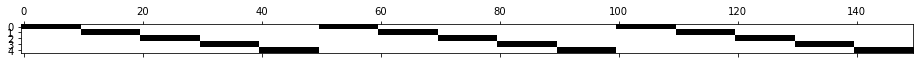

In [14]:
plot_cv(StratifiedKFold(n_splits=5), iris.data, iris.target)

For comparison, again the standard KFold, that ignores the labels:

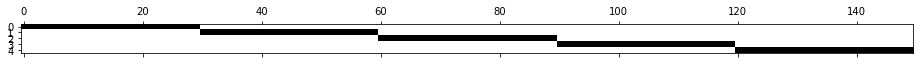

In [15]:
plot_cv(KFold(n_splits=5), iris.data, iris.target)

Keep in mind that increasing the number of folds will give you a larger training dataset, but will lead to more repetitions, and therefore a slower evaluation:

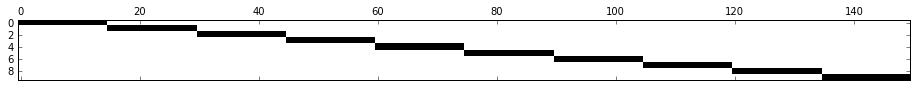

In [14]:
plot_cv(KFold(n_splits=10), iris.data, iris.target)

Another helpful cross-validation generator is ``ShuffleSplit``. This generator simply splits of a random portion of the data repeatedly. This allows the user to specify the number of repetitions and the training set size independently:

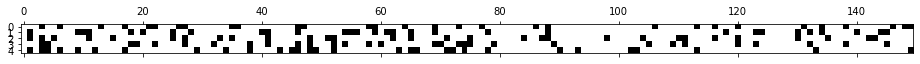

In [17]:
plot_cv(ShuffleSplit(n_splits=5, test_size=.2), iris.data, iris.target)

If you want a more robust estimate, you can just increase the number of splits:

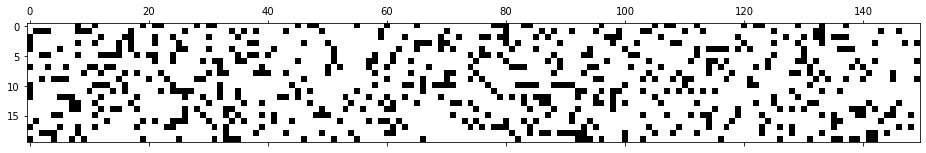

In [18]:
plot_cv(ShuffleSplit(n_splits=20, test_size=.2), iris.data, iris.target)

You can use all of these cross-validation generators with the `cross_val_score` method:

In [19]:
cv = ShuffleSplit(n_splits=5, test_size=.2)
cross_val_score(classifier, X, y, cv=cv)

array([0.93333333, 0.93333333, 0.96666667, 0.93333333, 1.        ])

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>
      Perform three-fold cross-validation using the ``KFold`` class on the iris dataset without shuffling the data. Can you explain the result?
      </li>
    </ul>
</div>

In [1]:
# %load solutions/13_cross_validation.py
cv = KFold(n_splits=3)
cross_val_score(classifier, iris.data, iris.target, cv=cv)


# A recap on Scikit-learn's estimator interface

Scikit-learn strives to have a uniform interface across all methods. Given a scikit-learn *estimator*
object named `model`, the following methods are available (not all for each model):

- Available in **all Estimators**
  + `model.fit()` : fit training data. For supervised learning applications,
    this accepts two arguments: the data `X` and the labels `y` (e.g. `model.fit(X, y)`).
    For unsupervised learning applications, `fit` takes only a single argument,
    the data `X` (e.g. `model.fit(X)`).
- Available in **supervised estimators**
  + `model.predict()` : given a trained model, predict the label of a new set of data.
    This method accepts one argument, the new data `X_new` (e.g. `model.predict(X_new)`),
    and returns the learned label for each object in the array.
  + `model.predict_proba()` : For classification problems, some estimators also provide
    this method, which returns the probability that a new observation has each categorical label.
    In this case, the label with the highest probability is returned by `model.predict()`.
  + `model.decision_function()` : For classification problems, some estimators provide an uncertainty estimate that is not a probability. For binary classification, a decision_function >= 0 means the positive class will be predicted, while < 0 means the negative class.
  + `model.score()` : for classification or regression problems, most (all?) estimators implement
    a score method.  Scores are between 0 and 1, with a larger score indicating a better fit. For classifiers, the `score` method computes the prediction accuracy. For regressors, `score` computes the coefficient of determination (R<sup>2</sup>) of the prediction.
  + `model.transform()` : For feature selection algorithms, this will reduce the dataset to the selected features. For some classification and regression models such as some linear models and random forests, this method reduces the dataset to the most informative features. These classification and regression models can therefore also be used as feature selection methods.
  
- Available in **unsupervised estimators**
  + `model.transform()` : given an unsupervised model, transform new data into the new basis.
    This also accepts one argument `X_new`, and returns the new representation of the data based
    on the unsupervised model.
  + `model.fit_transform()` : some estimators implement this method,
    which more efficiently performs a fit and a transform on the same input data.
  + `model.predict()` : for clustering algorithms, the predict method will produce cluster labels for new data points. Not all clustering methods have this functionality.
  + `model.predict_proba()` : Gaussian mixture models (GMMs) provide the probability for each point to be generated by a given mixture component.
  + `model.score()` : Density models like KDE and GMMs provide the likelihood of the data under the model.

Apart from ``fit``, the two most important functions are arguably ``predict`` to produce a target variable (a ``y``) ``transform``, which produces a new representation of the data (an ``X``).
The following table shows for which class of models which function applies:



<table>
<tr style="border:None; font-size:20px; padding:10px;"><th>``model.predict``</th><th>``model.transform``</th></tr>
<tr style="border:None; font-size:20px; padding:10px;"><td>Classification</td><td>Preprocessing</td></tr>
<tr style="border:None; font-size:20px; padding:10px;"><td>Regression</td><td>Dimensionality Reduction</td></tr>
<tr style="border:None; font-size:20px; padding:10px;"><td>Clustering</td><td>Feature Extraction</td></tr>
<tr style="border:None; font-size:20px; padding:10px;"><td>&nbsp;</td><td>Feature Selection</td></tr>

</table>


